# **EEG classification using a Recurrent Neural Network**

**Recurrent Neural Networks (RNNs) have several benefits when applied to EEG data:**

* RNNs can capture the temporal dependencies in EEG data. EEG signals are inherently temporal in nature, and RNNs are designed to model sequences of inputs. Therefore, RNNs can effectively capture the temporal dependencies between EEG signals at different time steps.

* RNNs can handle variable-length input sequences. EEG signals can have varying lengths, and RNNs can process sequences of varying length. This is particularly useful in EEG data, where the duration of a recording may vary depending on the experimental design.

* RNNs can learn long-term dependencies in EEG data. EEG signals can have long-term dependencies, and RNNs can learn to capture these dependencies using their memory cells. This is particularly useful in EEG data, where certain patterns may occur over long time periods.

* RNNs can handle multi-channel EEG data. EEG signals are often recorded using multiple channels, and RNNs can handle multi-dimensional input data. This allows RNNs to capture the dependencies between different channels in the EEG signals.

Overall, RNNs are well-suited for modeling EEG data due to their ability to capture temporal dependencies, handle variable-length sequences, learn long-term dependencies, and handle multi-channel input data.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Generate sample EEG data
num_samples = 256
num_channels = 32
eeg_data = np.random.randn(num_samples, num_channels)

# Define RNN parameters
time_steps = 32 # number of time steps
num_features = num_channels # number of features

# Reshape data for RNN input
X = np.reshape(eeg_data, (num_samples, time_steps, num_features))

In [2]:
from sklearn.metrics import confusion_matrix, classification_report
from keras.models import Sequential
from keras.layers import LSTM, Dense, Dropout, BatchNormalization, Bidirectional


# Define RNN model
model = Sequential()
model.add(Bidirectional(LSTM(128, return_sequences=True), input_shape=(time_steps, num_features)))
model.add(BatchNormalization())
model.add(Bidirectional(LSTM(128)))
model.add(Dropout(0.5))
model.add(Dense(64, activation='relu'))
model.add(BatchNormalization())
model.add(Dense(1, activation='sigmoid'))

# Compile the model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Split the data into train and test sets
# train_size = int(num_samples * 0.8)
# train_X = X[:train_size]
# test_X = X[train_size:]
# train_y = np.random.randint(0, 2, size=train_size)
# test_y = np.random.randint(0, 2, size=num_samples - train_size)

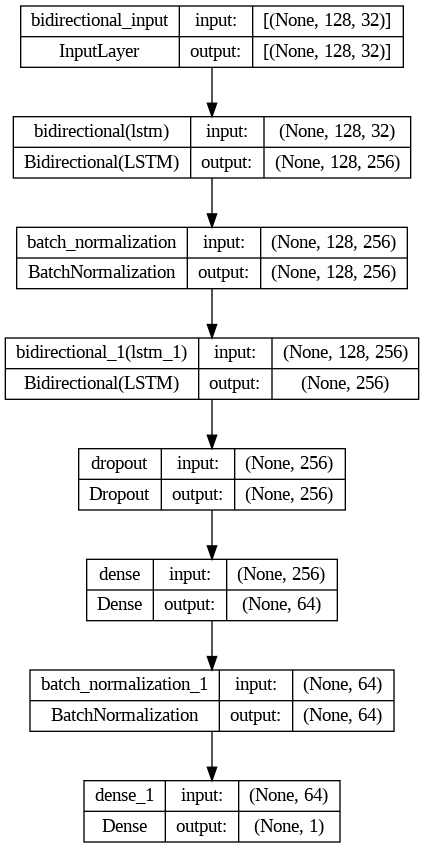

In [3]:
from tensorflow.keras.utils import plot_model
plot_model(model, to_file='EEG_with_RNN.png', show_shapes=True, show_layer_names=True)

In [ ]:
# Train the model
model.fit(train_X, train_y, epochs=10, batch_size=32, validation_split=0.2)

In [ ]:
# Evaluate the model on the test set
y_pred = model.predict_classes(test_X)
loss, accuracy = model.evaluate(test_X, test_y)
print('Test loss:', loss)
print('Test accuracy:', accuracy)

In [ ]:
# Compute and display the confusion matrix
cm = confusion_matrix(test_y, y_pred)
print('Confusion matrix:')
print(cm)

# Compute and display the classification report
cr = classification_report(test_y, y_pred)
print('Classification report:')
print(cr)